# Perceptron learning Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import torch

## AND Dataset

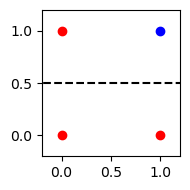

In [2]:
X = np.array([ 
                [0,0],
                [0,1],
                [1,0],
                [1,1]
              ])
y = np.array([
    0,0,0,1
])

def plot_result(X,y,w, step=None,fig=None):
    if y.max() == 1 and y.min() == 0:
        y = np.where(y == 1,1, -1)
    if fig is not None:
        plt.figure(figsize=fig)
    else:
        plt.figure(figsize=(2,2))
    blue_mask = y == 1
    # print(f'{X.shape = }, {y.shape = } {w.shape = } ')
    plt.scatter(X[blue_mask][:,0], X[blue_mask][:,1],color = 'blue')
    plt.scatter(X[~blue_mask][:,0], X[~blue_mask][:,1],color = 'red')
    
    x0 = np.linspace(-10, 10, 200)
    if w[1] != 0:
        x1 = - (w[2] + x0 * w[0]) / w[1]
        plt.plot(x0, x1, "k--", label=r"$w^Tx + b = 0$")
    else: 
        x1 = np.ones(x0.shape[0]) * -w[2]
        plt.plot(x1, x0, "k--", label=r"$w^Tx + b = 0$")
        
    if step is not None:
        fw = '[' + ','.join([f'{wi:.2f}' for wi in w[:-1] ]) +']'
        plt.title(f'Iteration {step}  ($w =$ {fw},$b =$ {w[-1]:.2f})')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    # plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()
    
plot_result(X,y,np.array([0,-1,0.5]))

iteration 0:
[missed] xi = array([0., 0., 1.]) yi = -1
[missed] xi = array([1., 1., 1.]) yi = 1


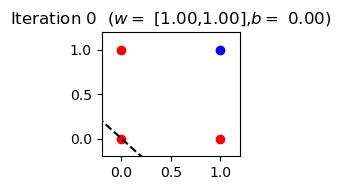

iteration 1:
[missed] xi = array([0., 0., 1.]) yi = -1
[missed] xi = array([0., 1., 1.]) yi = -1
[missed] xi = array([1., 1., 1.]) yi = 1


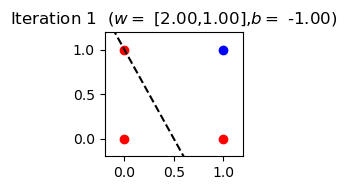

iteration 2:
[missed] xi = array([0., 1., 1.]) yi = -1
[missed] xi = array([1., 0., 1.]) yi = -1
[missed] xi = array([1., 1., 1.]) yi = 1


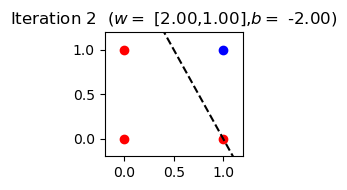

iteration 3:
[missed] xi = array([1., 0., 1.]) yi = -1
[missed] xi = array([1., 1., 1.]) yi = 1


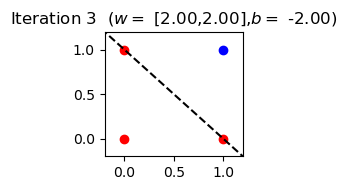

iteration 4:
[missed] xi = array([0., 1., 1.]) yi = -1
[missed] xi = array([1., 1., 1.]) yi = 1


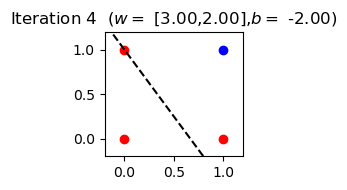

iteration 5:
[missed] xi = array([0., 1., 1.]) yi = -1
[missed] xi = array([1., 0., 1.]) yi = -1
[missed] xi = array([1., 1., 1.]) yi = 1


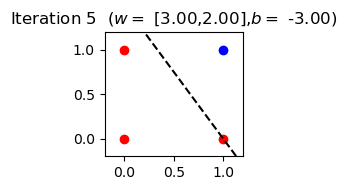

iteration 6:
[missed] xi = array([1., 0., 1.]) yi = -1
[missed] xi = array([1., 1., 1.]) yi = 1


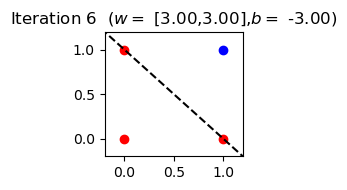

iteration 7:
[missed] xi = array([0., 1., 1.]) yi = -1


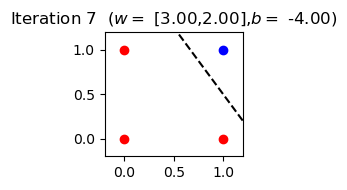

iteration 8:
 No misclassifications ; Took 8 iterations; [CONVERGED!]


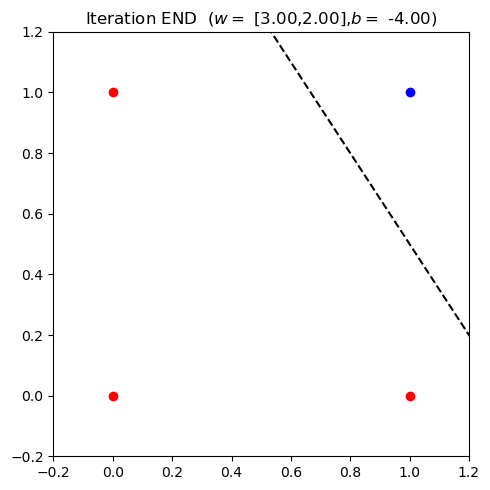

In [3]:
def learn_perceptron(X: np.ndarray,y:np.ndarray, w0 = None, plot_ = False, verbose = False, max_iter = 100):
    n, m = X.shape
    if w0 is not None:
        w = w0
    else:
        w = np.zeros(m + 1)
    if y.max() == 1 and y.min() == 0:
        y = np.where(y == 1,1, -1)
    # print(f'{X.shape = }, {np.ones(n).shape = } ')
    X = np.concatenate((X,np.ones((n,1))), axis=1)    
    # print(f'{X.shape = }, {y.shape = } {w.shape = }')
    misclassified = 0
    for i in range(max_iter):
        print(f'iteration {i}:')
        for xi,yi in zip(X,y):
            # print(f'{xi.shape = } {yi.shape = } {w.shape = }')
            if np.dot(w,xi) * yi <= 0:
                if verbose:
                    print(f'[missed] {xi = } {yi = }')
                w += yi * xi
                misclassified += 1
        if misclassified == 0:
            if verbose:
                print(f' No misclassifications ; Took {i} iterations; [CONVERGED!]')
            return w[:-1] , w[-1]
        else:
            misclassified = 0
        if plot_:
            plot_result(X,y,w,i)
    
    return w[:-1] , w[-1]
            
w, b = learn_perceptron(X,y,plot_ = True,verbose = True)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

## OR dataset

iteration 0:


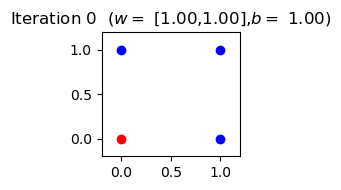

iteration 1:


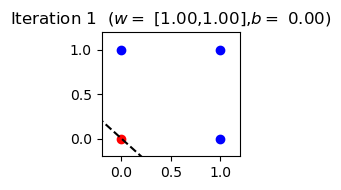

iteration 2:


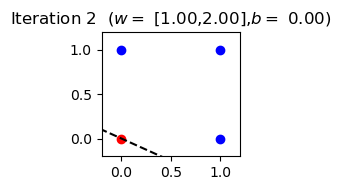

iteration 3:


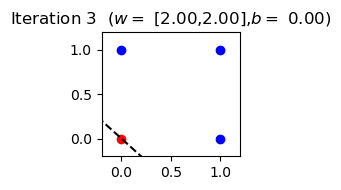

iteration 4:


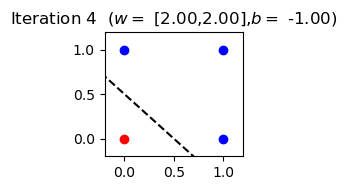

iteration 5:


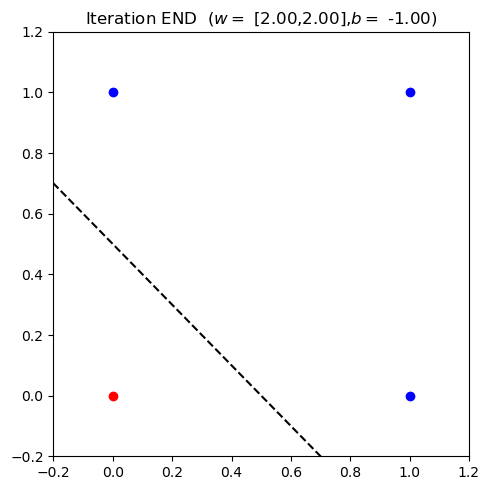

In [4]:
X = np.array([ 
                [0,0],
                [0,1],
                [1,0],
                [1,1]
              ])
y = np.array([
    0,1,1,1
])
w,b = learn_perceptron(X,y,plot_ = True)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

## seperable dataset - 1

iteration 0:


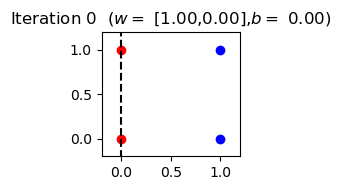

iteration 1:


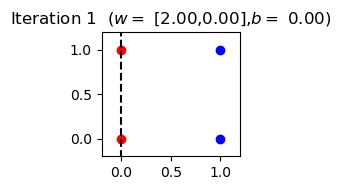

iteration 2:


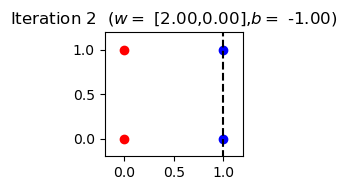

iteration 3:


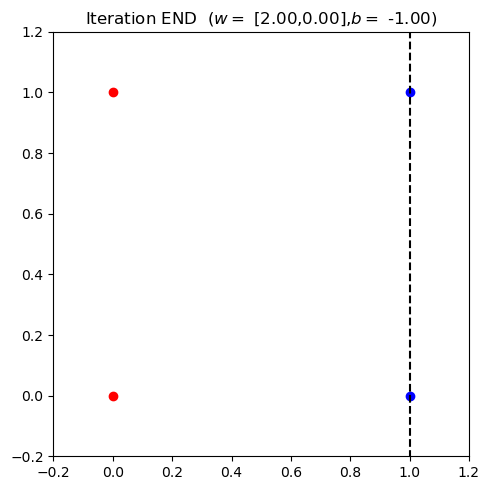

In [5]:
X = np.array([ 
                [0,0],
                [0,1],
                [1,0],
                [1,1]
              ])
y = np.array([
    0,0,1,1
])
w,b = learn_perceptron(X,y,plot_ = True)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

## seperable dataset - 2

iteration 0:


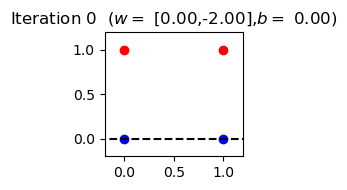

iteration 1:


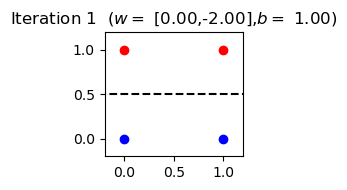

iteration 2:


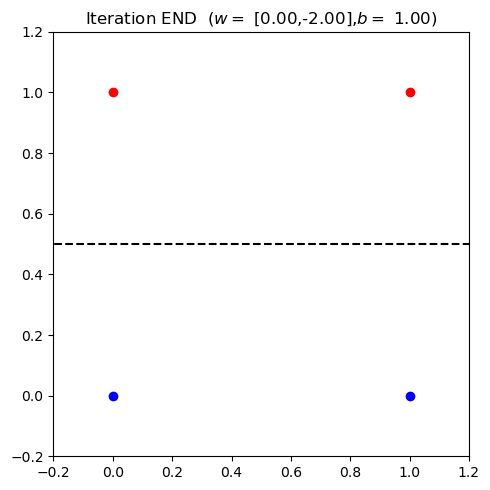

In [6]:
X = np.array([ 
                [0,0],
                [0,1],
                [1,0],
                [1,1]
              ])
y = np.array([
    1,0,1,0
])
w,b = learn_perceptron(X,y,plot_ = True)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

## seperable dataset - 3

iteration 0:


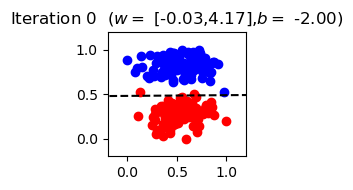

iteration 1:


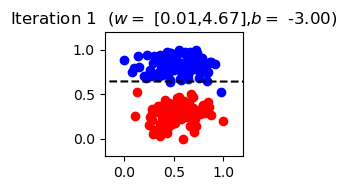

iteration 2:


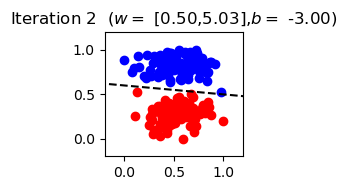

iteration 3:


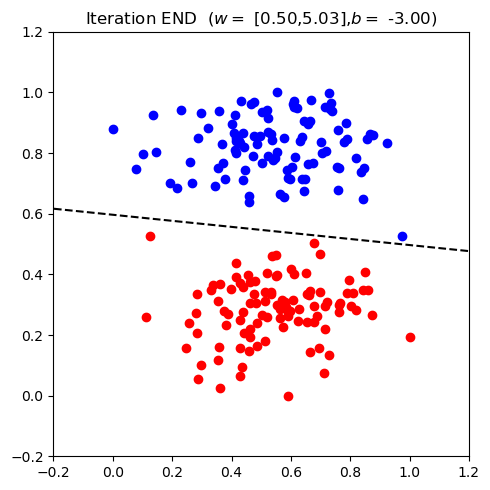

In [7]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
n = 100
d = 2
ranges = 3
negatives = np.random.randn(n, d) + np.array([-ranges, -ranges])
postives = np.random.randn(n, d) + np.array([-ranges, ranges])

postives = np.column_stack((postives, np.ones(n)))
negatives = np.column_stack((negatives, np.zeros(n)))

data = np.vstack((postives, negatives))
np.random.shuffle(data)

X, y = data[:, :-1], data[:, -1] 

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

w,b = learn_perceptron(X,y,plot_ = True)

plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

# Non Seperable Datasets

## XOR

iteration 0:
iteration 1:
iteration 2:
iteration 3:
iteration 4:
iteration 5:
iteration 6:
iteration 7:
iteration 8:
iteration 9:
iteration 10:
iteration 11:
iteration 12:
iteration 13:
iteration 14:
iteration 15:
iteration 16:
iteration 17:
iteration 18:
iteration 19:
iteration 20:
iteration 21:
iteration 22:
iteration 23:
iteration 24:
iteration 25:
iteration 26:
iteration 27:
iteration 28:
iteration 29:
iteration 30:
iteration 31:
iteration 32:
iteration 33:
iteration 34:
iteration 35:
iteration 36:
iteration 37:
iteration 38:
iteration 39:
iteration 40:
iteration 41:
iteration 42:
iteration 43:
iteration 44:
iteration 45:
iteration 46:
iteration 47:
iteration 48:
iteration 49:


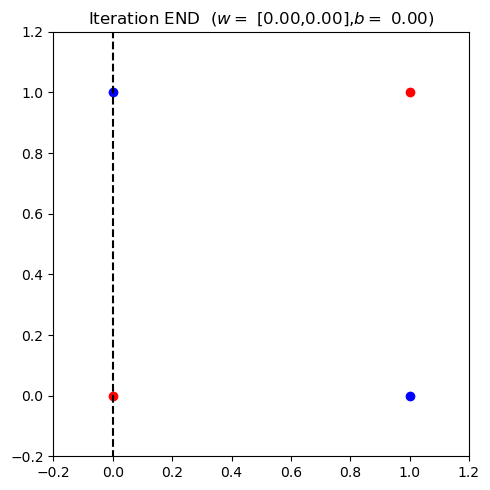

In [8]:

X = np.array([ 
                [0,0],
                [0,1],
                [1,0],
                [1,1]
              ])
y = np.array([
    0,1,1,0
])
w,b = learn_perceptron(X,y,plot_ = False, max_iter=50)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

## non seperable with a hyperplane


iteration 0:


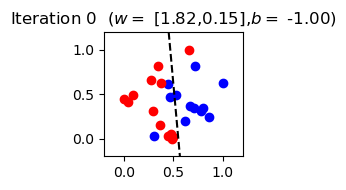

iteration 1:


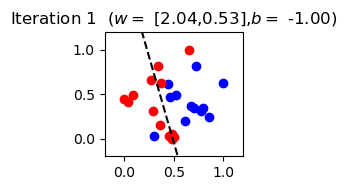

iteration 2:


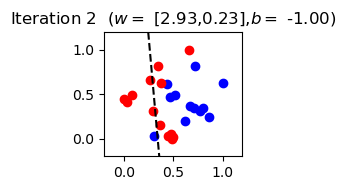

iteration 3:


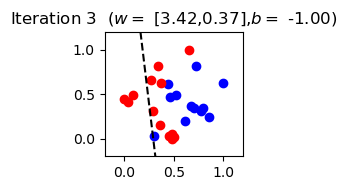

iteration 4:


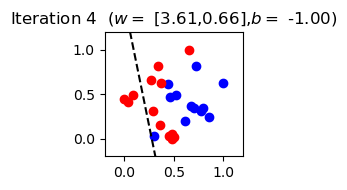

iteration 5:


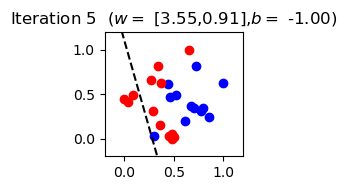

iteration 6:


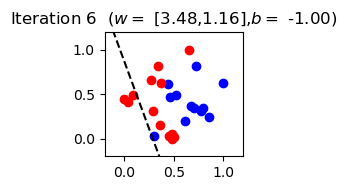

iteration 7:


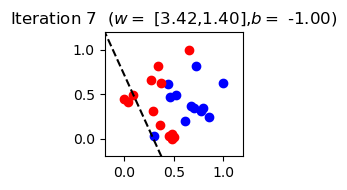

iteration 8:


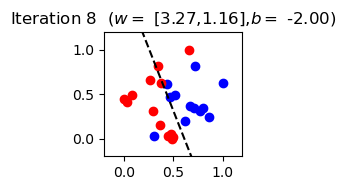

iteration 9:


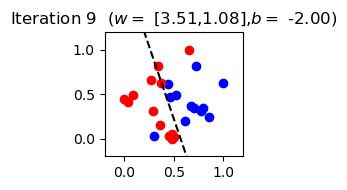

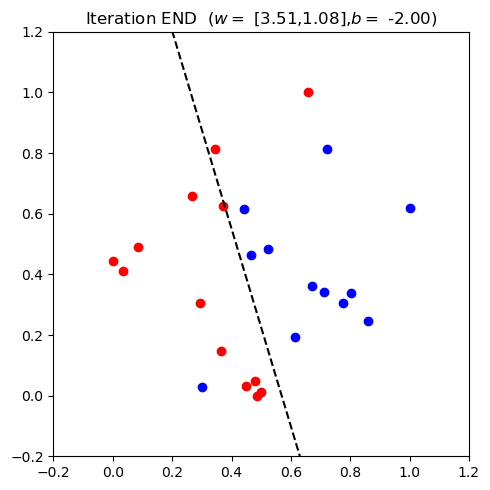

In [9]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
X, y = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

w,b = learn_perceptron(X,y,plot_ = True, max_iter=10)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

# interesting cases

# single data point

array([0.84947451, 0.48714692, 0.20240916])

iteration 0:


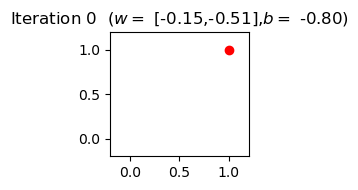

iteration 1:


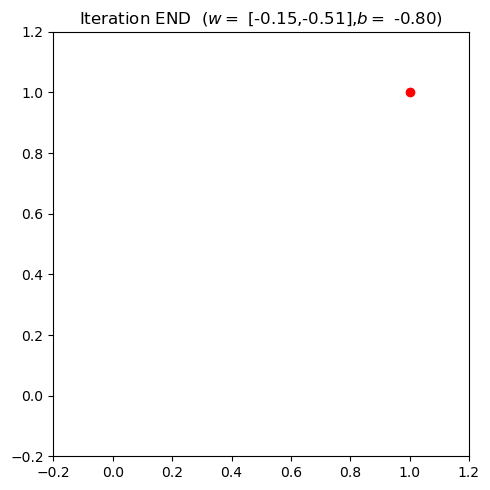

In [10]:
X = np.array([ 
                [1,1]
              ])
y = np.array([
    -1
])
w0 = np.random.random(3)
w0
w,b = learn_perceptron(X,y,plot_ = True, w0 = w0)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))

array([0.85121042, 0.44052299, 0.47810775])

iteration 0:


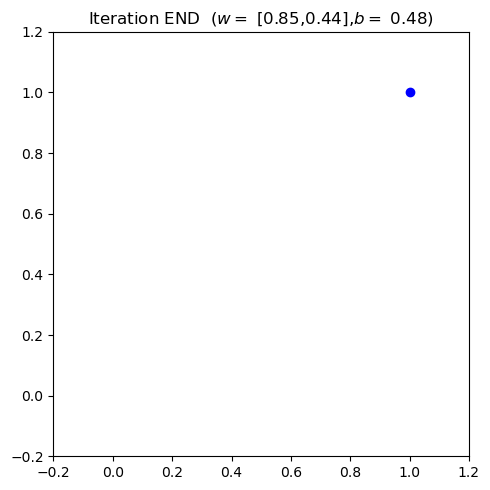

In [11]:
X = np.array([ 
                [1,1]
              ])
y = np.array([
    1
])
w0 = np.random.random(3)
w0
w,b = learn_perceptron(X,y,plot_ = True, w0 = w0)
plot_result(X,y,np.array([*w,b]), step='END',fig=(5,5))